In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [55]:
df = pd.read_csv('../data/dataset.csv')

In [56]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Income(dollar)', 'Coapplicant', 'Loan_Amount', 'Term(month)',
       'loan_History', 'Area', 'Status'],
      dtype='object')

In [57]:
df.isnull().any()

Gender             True
Married            True
Dependents         True
Education         False
Self_Employed      True
Income(dollar)    False
Coapplicant        True
Loan_Amount       False
Term(month)        True
loan_History       True
Area              False
Status            False
dtype: bool

In [58]:
df.dropna(inplace = True)
df

,Gender,Married,Dependents,Education,Self_Employed,Income(dollar),Coapplicant,Loan_Amount,Term(month),loan_History,Area,Status
0,Male,No,0,Not Graduate,No,144200.0,No,3500000,360.0,1.0,Urban,N
1,Female,No,3+,Not Graduate,No,183000.0,No,0,360.0,0.0,Urban,N
3,Male,Yes,0,Graduate,No,195000.0,Yes,13500000,360.0,1.0,Rural,N
4,Female,No,0,Not Graduate,No,196300.0,No,5300000,360.0,1.0,Semiurban,Y
5,Male,No,0,Not Graduate,No,200000.0,No,0,360.0,1.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...
606,Male,No,0,Graduate,No,3567300.0,Yes,9000000,360.0,1.0,Urban,N
607,Male,No,1,Graduate,No,3771900.0,No,15200000,360.0,1.0,Semiurban,Y
608,Male,Yes,3+,Graduate,No,3999900.0,No,60000000,180.0,0.0,Semiurban,Y
610,Male,Yes,0,Graduate,Yes,4389700.0,Yes,12000000,360.0,1.0,Semiurban,Y


In [59]:
df.describe(include = 'all')

,Gender,Married,Dependents,Education,Self_Employed,Income(dollar),Coapplicant,Loan_Amount,Term(month),loan_History,Area,Status
count,496,496,496,496,496,4.960000e+02,496,4.960000e+02,496.000000,496.000000,496,496
unique,2,3,4,2,2,NaN,2,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,Yes,NaN,NaN,NaN,Semiurban,Y
freq,409,323,281,393,428,NaN,274,NaN,NaN,NaN,193,339
mean,NaN,NaN,NaN,NaN,NaN,6.929423e+05,NaN,1.399012e+07,341.661290,0.850806,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,5.916109e+05,NaN,8.355747e+06,64.749261,0.356639,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.442000e+05,NaN,0.000000e+00,36.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,4.164500e+05,NaN,9.900000e+06,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.439000e+05,NaN,1.260000e+07,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,7.559000e+05,NaN,1.672500e+07,360.000000,1.000000,NaN,NaN


In [60]:
df['Status'] = df['Status'].map({'Y': 1, 'N': 0})
df['Gender'] = df['Gender'].map({'Male' : 1, 'Female' : 0})
df['Married'] = df['Married'].map({'Yes' : 1, 'No' : 0})
df['Education'] = df['Education'].map({'Graduate' : 1, 'Not Graduate' : 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes' : 1, 'No' : 0})
df['Area'] = df['Area'].map({'Urban' : 1, 'Semiurban' : 2, 'Rural' : 3})
df['Coapplicant'] = df['Coapplicant'].map({'Yes' : 1, 'No' : 0})
df['Dependents'] = df['Dependents'].map({'0' : 1,'1' : 2,'2':3,'3+' : 4})

df = df.dropna()
df.astype(int)

,Gender,Married,Dependents,Education,Self_Employed,Income(dollar),Coapplicant,Loan_Amount,Term(month),loan_History,Area,Status
0,1,0,1,0,0,144200,0,3500000,360,1,1,0
1,0,0,4,0,0,183000,0,0,360,0,1,0
3,1,1,1,1,0,195000,1,13500000,360,1,3,0
4,0,0,1,0,0,196300,0,5300000,360,1,2,1
5,1,0,1,0,0,200000,0,0,360,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
606,1,0,1,1,0,3567300,1,9000000,360,1,1,0
607,1,0,2,1,0,3771900,0,15200000,360,1,2,1
608,1,1,4,1,0,3999900,0,60000000,180,0,2,1
610,1,1,1,1,1,4389700,1,12000000,360,1,2,1


In [61]:
df.describe(include = 'all')

,Gender,Married,Dependents,Education,Self_Employed,Income(dollar),Coapplicant,Loan_Amount,Term(month),loan_History,Area,Status
count,493.000000,493.000000,493.000000,493.000000,493.000000,4.930000e+02,493.000000,4.930000e+02,493.000000,493.000000,493.000000,493.000000
mean,0.827586,0.655172,1.789047,0.791075,0.137931,6.944886e+05,0.555781,1.399777e+07,341.549696,0.849899,1.975659,0.683570
std,0.378123,0.475795,1.024160,0.406954,0.345178,5.930120e+05,0.497383,8.379632e+06,64.930482,0.357534,0.783088,0.465555
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.442000e+05,0.000000,0.000000e+00,36.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,0.000000,4.166000e+05,0.000000,9.900000e+06,360.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,5.450000e+05,1.000000,1.260000e+07,360.000000,1.000000,2.000000,1.000000
75%,1.000000,1.000000,3.000000,1.000000,0.000000,7.583000e+05,1.000000,1.680000e+07,360.000000,1.000000,3.000000,1.000000
max,1.000000,1.000000,4.000000,1.000000,1.000000,8.100000e+06,1.000000,6.000000e+07,480.000000,1.000000,3.000000,1.000000


In [62]:
X = df.drop('Status', axis=1)
y = df['Status']

scale = MinMaxScaler()
x_scaled = pd.DataFrame(scale.fit_transform(X), columns=X.columns)
x_scaled

,Gender,Married,Dependents,Education,Self_Employed,Income(dollar),Coapplicant,Loan_Amount,Term(month),loan_History,Area
0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.058333,0.729730,1.0,0.0
1,0.0,0.0,1.000000,0.0,0.0,0.004877,0.0,0.000000,0.729730,0.0,0.0
2,1.0,1.0,0.000000,1.0,0.0,0.006385,1.0,0.225000,0.729730,1.0,1.0
3,0.0,0.0,0.000000,0.0,0.0,0.006549,0.0,0.088333,0.729730,1.0,0.5
4,1.0,0.0,0.000000,0.0,0.0,0.007014,0.0,0.000000,0.729730,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
488,1.0,0.0,0.000000,1.0,0.0,0.430265,1.0,0.150000,0.729730,1.0,0.0
489,1.0,0.0,0.333333,1.0,0.0,0.455982,0.0,0.253333,0.729730,1.0,0.5
490,1.0,1.0,1.000000,1.0,0.0,0.484640,0.0,1.000000,0.324324,0.0,0.5
491,1.0,1.0,0.000000,1.0,1.0,0.533636,1.0,0.200000,0.729730,1.0,0.5


In [63]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)

pickle.dump(svm_predictions, open('SVM_model.pkl', 'wb'))
pickle.dump(dt_predictions, open('DecisionTree_model.pkl', 'wb'))

------SVM------
Accuracy: 0.8378378378378378
Precision: 0.8456918456918456
Recall: 0.8378378378378378
F1-Score: 0.8156370656370656
Confusion Matrix:


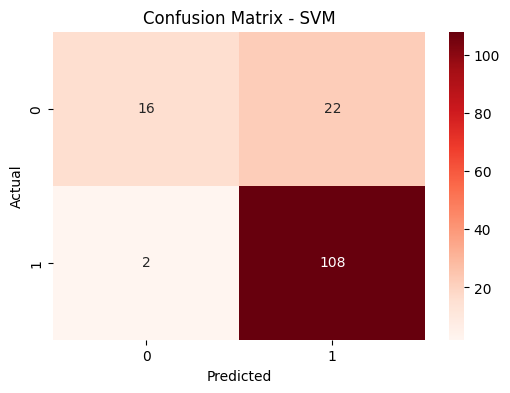


--------------------------Decision Tree--------------------------
Accuracy: 0.7432432432432432
Precision: 0.7787162162162162
Recall: 0.7432432432432432
F1-Score: 0.7544884690515757
Confusion Matrix:


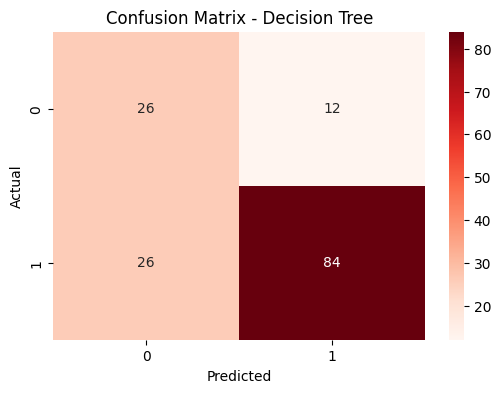

In [64]:
def printAnswer(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)

    print("-" * len(model_name) * 2 + model_name + "-" * len(model_name) * 2)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print("Confusion Matrix:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    print()

printAnswer("SVM", y_test, svm_predictions)
printAnswer("Decision Tree", y_test, dt_predictions)